In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load datasets
file_paths = {
    "10.8": "10.8.csv",
    "10.16": "10.16.csv",
}

# Load all CSVs into dataframes
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

In [4]:
# Combine all datasets into a single dataframe with labels
for name, df in dataframes.items():
    df['folds'] = int(name.split('.')[0])  # Extract k-fold count (5 or 10)
    df['batch_size'] = int(name.split('.')[1])  # Extract batch size (8 or 16)
data = pd.concat(dataframes.values(), ignore_index=True)

In [5]:

# Display summary statistics
print("Summary Statistics:\n", data.describe())

Summary Statistics:
        learning_rate      epochs  batch_size  hidden_size  num_layers  \
count   1.160000e+02  116.000000  116.000000   116.000000  116.000000   
mean    1.000000e-03   75.517241   12.000000   154.482759    2.086207   
std     6.533435e-19   25.583447    4.017354    80.984645    0.860424   
min     1.000000e-03   40.000000    8.000000    64.000000    1.000000   
25%     1.000000e-03   40.000000    8.000000    64.000000    1.000000   
50%     1.000000e-03   80.000000   12.000000   128.000000    2.000000   
75%     1.000000e-03  100.000000   16.000000   256.000000    3.000000   
max     1.000000e-03  120.000000   16.000000   256.000000    4.000000   

       avg_train_loss  avg_val_loss  avg_mask2_coverage  avg_mask2_accuracy  \
count      116.000000    116.000000          116.000000          116.000000   
mean         0.385638      0.384936            0.621995            0.688195   
std          0.122261      0.112068            0.113500            0.115660   
min  

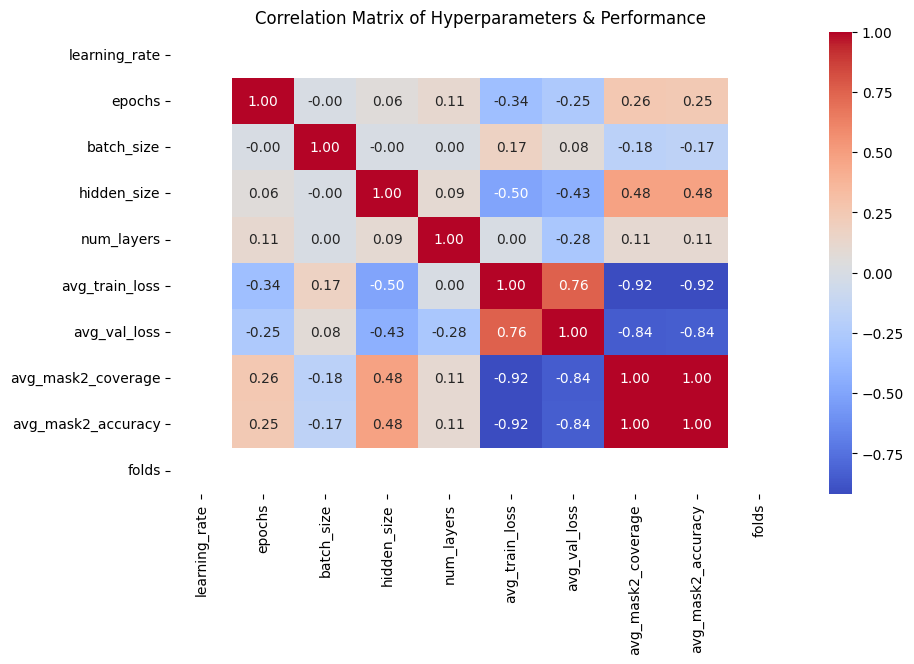

In [6]:
# Exclude non-numeric columns before computing correlations
numeric_data = data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Hyperparameters & Performance")
plt.show()

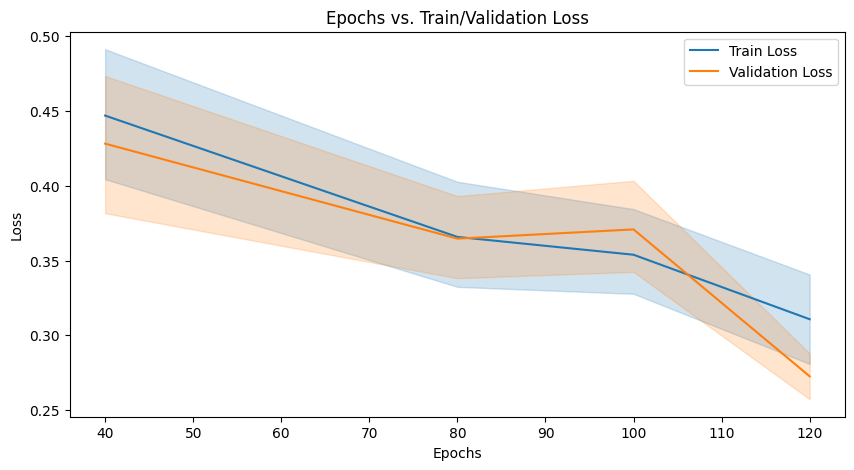

In [7]:
# 1. Epochs vs. Loss
plt.figure(figsize=(10, 5))
sns.lineplot(x='epochs', y='avg_train_loss', data=data, label='Train Loss')
sns.lineplot(x='epochs', y='avg_val_loss', data=data, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs. Train/Validation Loss")
plt.legend()
plt.show()

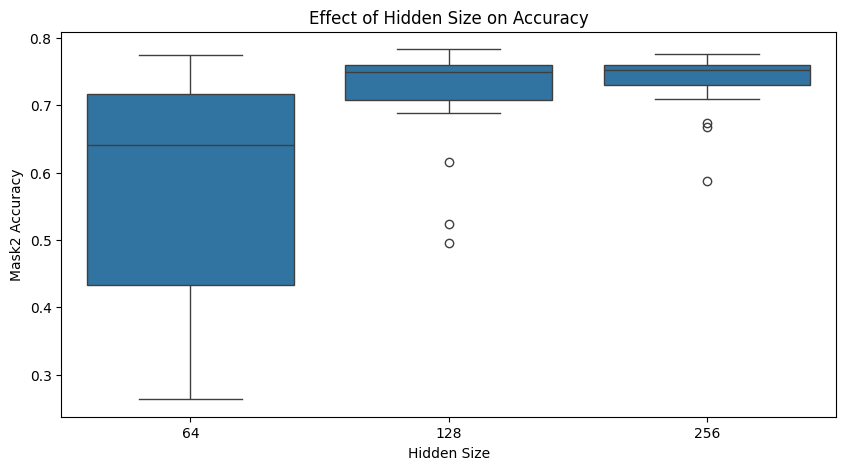

In [8]:
# 2. Hidden Size vs. Accuracy
plt.figure(figsize=(10, 5))
sns.boxplot(x="hidden_size", y="avg_mask2_accuracy", data=data)
plt.xlabel("Hidden Size")
plt.ylabel("Mask2 Accuracy")
plt.title("Effect of Hidden Size on Accuracy")
plt.show()

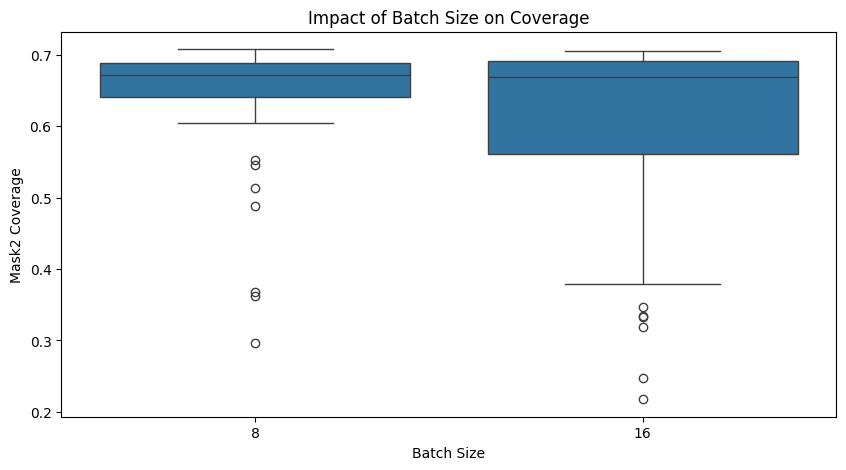

In [9]:
# 3. Batch Size Effect on Coverage
plt.figure(figsize=(10, 5))
sns.boxplot(x="batch_size", y="avg_mask2_coverage", data=data)
plt.xlabel("Batch Size")
plt.ylabel("Mask2 Coverage")
plt.title("Impact of Batch Size on Coverage")
plt.show()

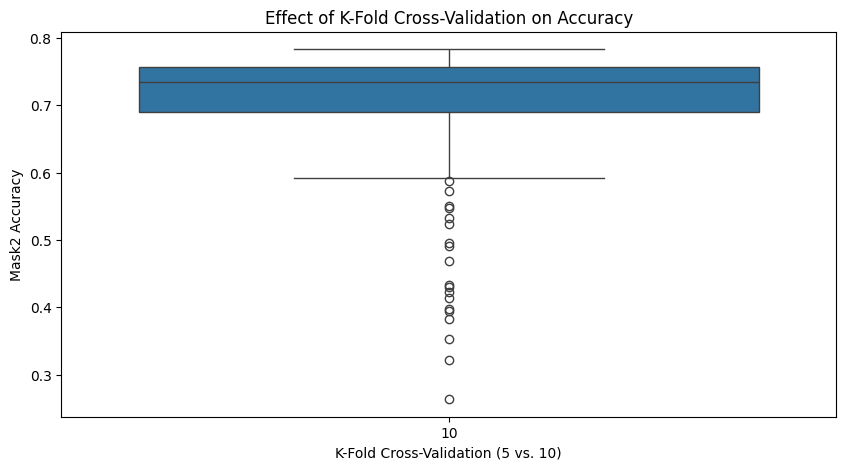

In [10]:
# 4. K-Fold Effect on Accuracy
plt.figure(figsize=(10, 5))
sns.boxplot(x="folds", y="avg_mask2_accuracy", data=data)
plt.xlabel("K-Fold Cross-Validation (5 vs. 10)")
plt.ylabel("Mask2 Accuracy")
plt.title("Effect of K-Fold Cross-Validation on Accuracy")
plt.show()

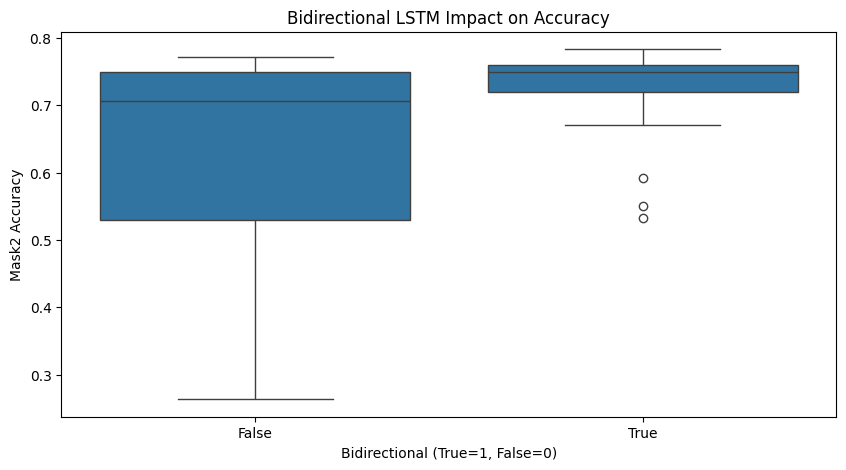

In [11]:
# 5. Bidirectional Effect on Accuracy
plt.figure(figsize=(10, 5))
sns.boxplot(x="bidirectional", y="avg_mask2_accuracy", data=data)
plt.xlabel("Bidirectional (True=1, False=0)")
plt.ylabel("Mask2 Accuracy")
plt.title("Bidirectional LSTM Impact on Accuracy")
plt.show()

In [33]:
df_combined['epochs'].max()

120

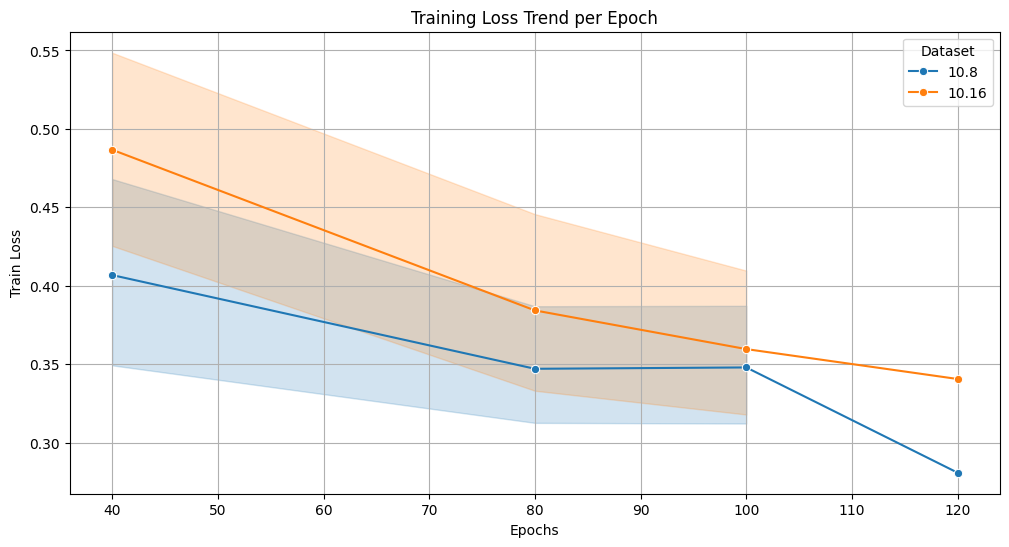

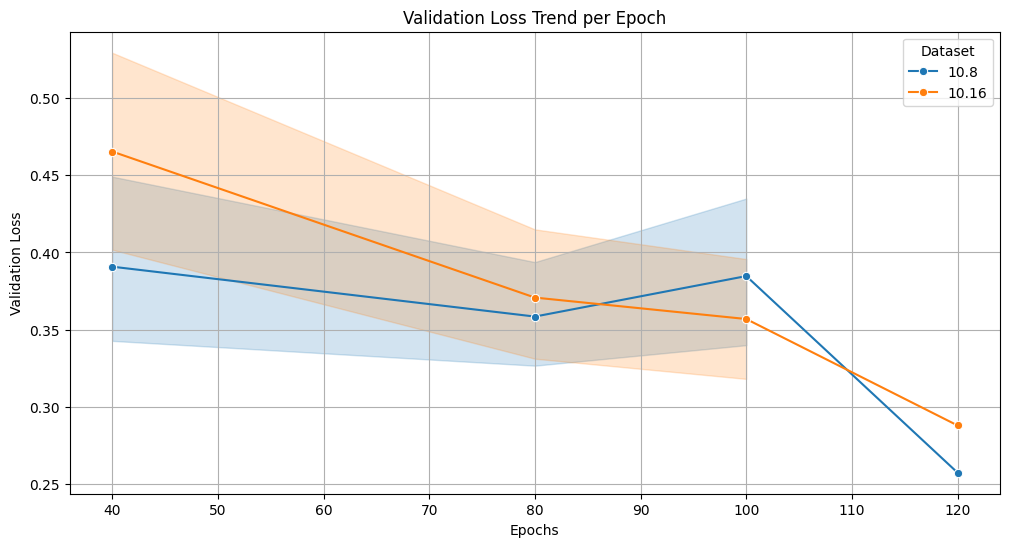

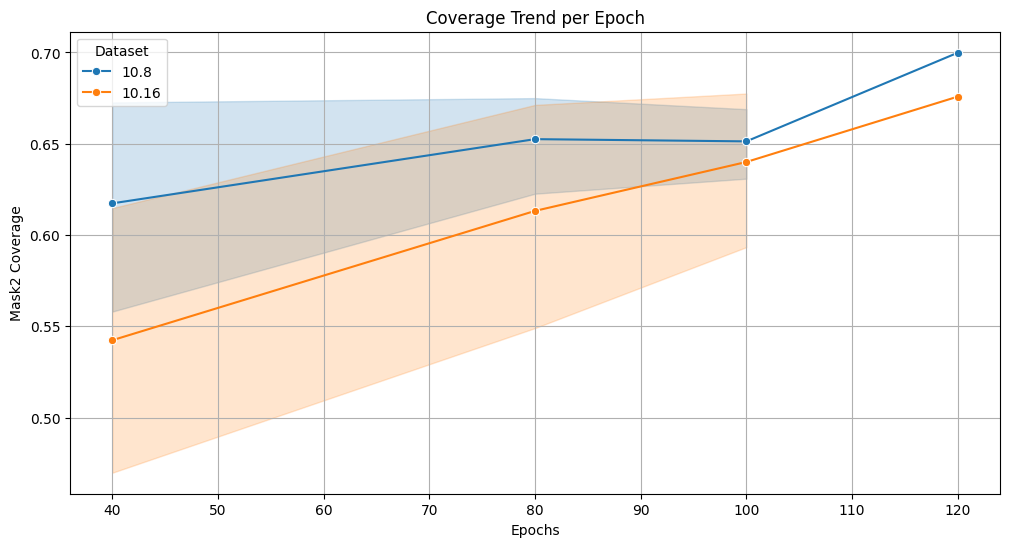

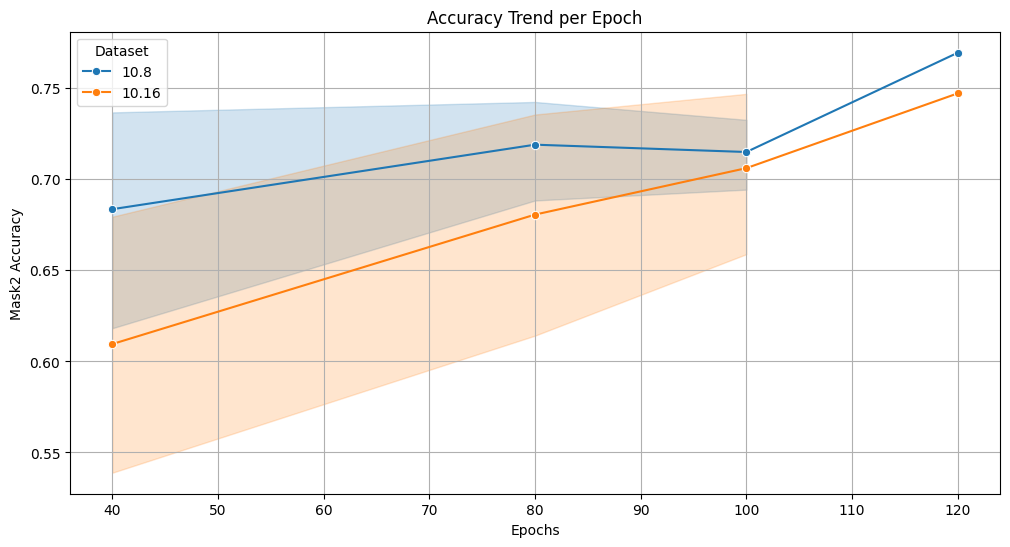

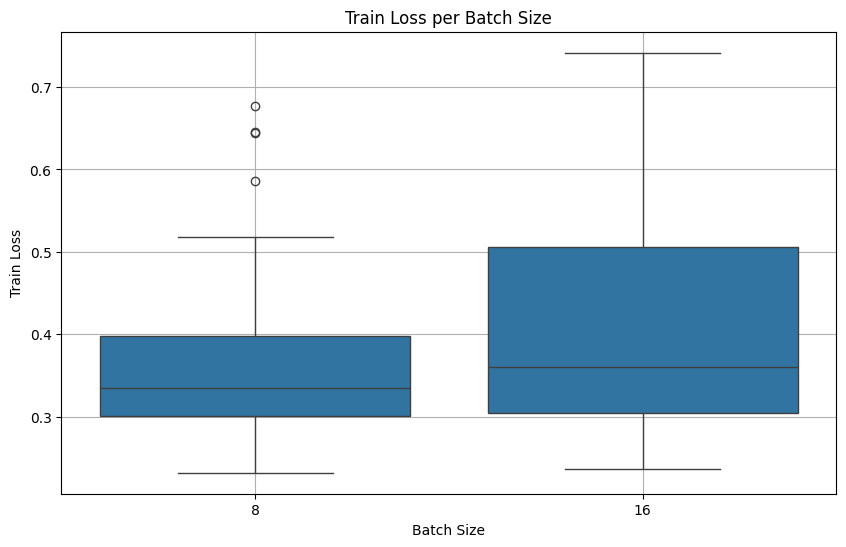

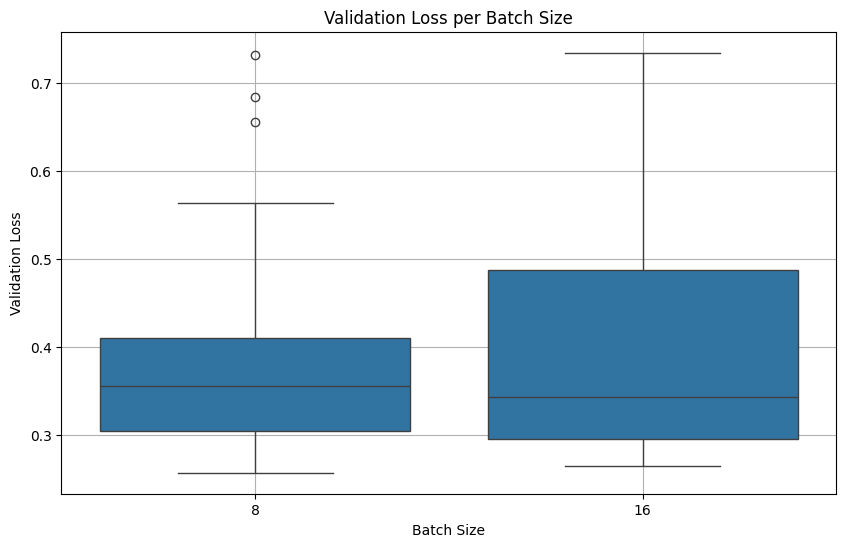

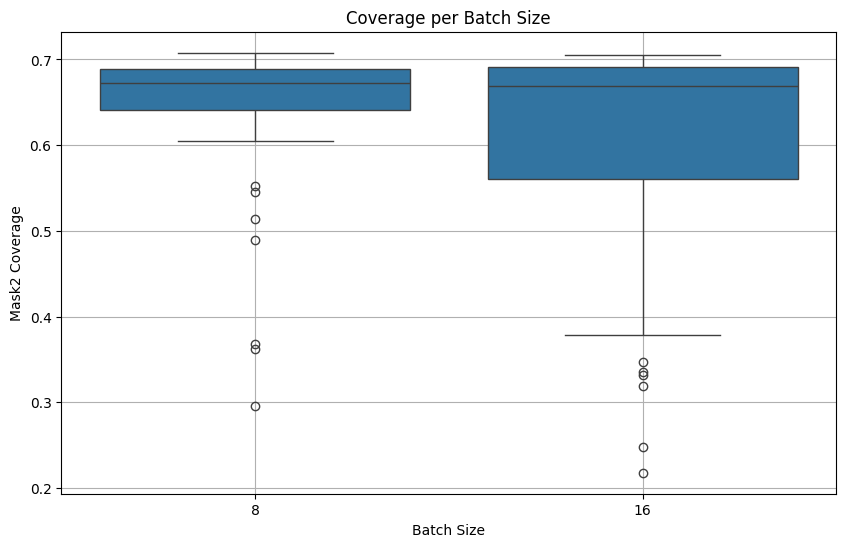

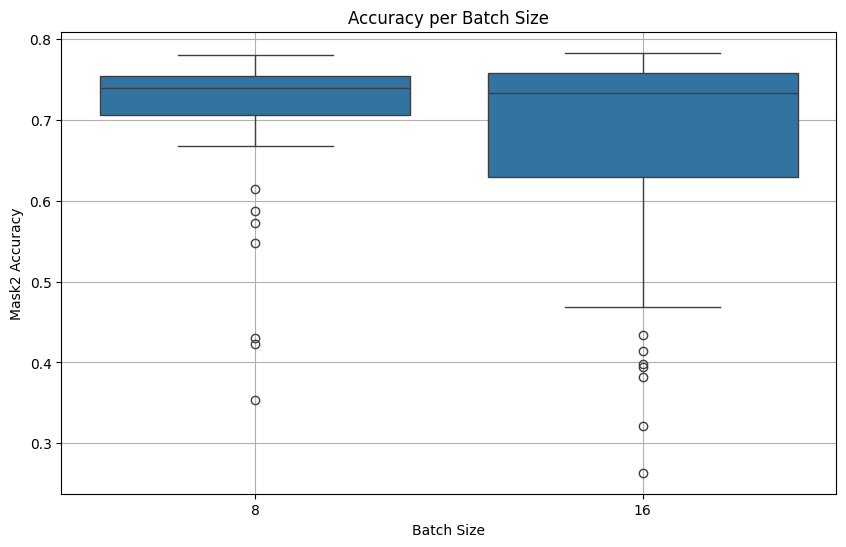

NameError: name 'tools' is not defined

In [12]:


# Aggregate all data for a combined EDA
df_combined = pd.concat(dataframes.values(),
                        keys=dataframes.keys(), names=['dataset'])

# Reset index for easier manipulation
df_combined.reset_index(inplace=True)

# Function to plot loss, coverage, and accuracy trends per epoch


def plot_metric_trends(df, metric, title, ylabel):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='epochs', y=metric, hue='dataset', marker='o')
    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title="Dataset")
    plt.grid(True)
    plt.show()


# Plot trends for Loss, Coverage, and Accuracy per Epoch
plot_metric_trends(df_combined, "avg_train_loss",
                   "Training Loss Trend per Epoch", "Train Loss")
plot_metric_trends(df_combined, "avg_val_loss",
                   "Validation Loss Trend per Epoch", "Validation Loss")
plot_metric_trends(df_combined, "avg_mask2_coverage",
                   "Coverage Trend per Epoch", "Mask2 Coverage")
plot_metric_trends(df_combined, "avg_mask2_accuracy",
                   "Accuracy Trend per Epoch", "Mask2 Accuracy")

# Function to plot performance trends per batch size


def plot_performance_by_batch(df, metric, title, ylabel):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="batch_size", y=metric, data=df)
    plt.xlabel("Batch Size")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()


# Plot performance per batch size
plot_performance_by_batch(df_combined, "avg_train_loss",
                          "Train Loss per Batch Size", "Train Loss")
plot_performance_by_batch(df_combined, "avg_val_loss",
                          "Validation Loss per Batch Size", "Validation Loss")
plot_performance_by_batch(
    df_combined, "avg_mask2_coverage", "Coverage per Batch Size", "Mask2 Coverage")
plot_performance_by_batch(
    df_combined, "avg_mask2_accuracy", "Accuracy per Batch Size", "Mask2 Accuracy")

# Insights on best-performing models
best_models = df_combined.nsmallest(5, "avg_val_loss")[
    ["dataset", "epochs", "batch_size", "hidden_size", "num_layers", "avg_val_loss", "avg_mask2_coverage", "avg_mask2_accuracy"]]

# Display best-performing models
tools.display_dataframe_to_user(
    name="Top 5 Best Performing Models", dataframe=best_models)

In [ ]:
# Define overfitting condition: when train loss is significantly lower than validation loss
overfitting_threshold = 0

# Identify overfitting models in each dataset
overfitting_models = []
for name, df in dataframes.items():
    overfit_df = df[df["avg_train_loss"] < (
        df["avg_val_loss"] - overfitting_threshold)].copy()
    overfit_df["Dataset"] = name  # Add dataset name as a column
    overfitting_models.append(overfit_df)

# Combine all overfitting models into a single dataframe
overfitting_models_df = pd.concat(overfitting_models, ignore_index=True)

# Total count of overfitted jobs
total_overfitted_jobs = len(overfitting_models_df)

# Display total count and full details
print(f"Total Overfitted Jobs: {total_overfitted_jobs}")
overfitting_models_df

Total Overfitted Jobs: 48


,job_name,learning_rate,epochs,batch_size,hidden_size,num_layers,bidirectional,avg_train_loss,avg_val_loss,avg_mask2_coverage,avg_mask2_accuracy,folds,Dataset
0,job_2,0.001,40,8,64,1,False,0.645685,0.732286,0.296099,0.352964,10,10.8
1,job_3,0.001,40,8,64,2,True,0.380669,0.439495,0.604732,0.670735,10,10.8
2,job_9,0.001,80,8,64,2,True,0.352076,0.477022,0.656485,0.721170,10,10.8
3,job_13,0.001,100,8,64,1,True,0.319279,0.405735,0.640992,0.710269,10,10.8
4,job_15,0.001,100,8,64,2,True,0.241469,0.312655,0.697648,0.761484,10,10.8
5,job_19,0.001,40,8,128,1,True,0.311953,0.329372,0.688010,0.752841,10,10.8
6,job_21,0.001,40,8,128,2,True,0.259960,0.327832,0.693551,0.760625,10,10.8
7,job_22,0.001,40,8,128,2,False,0.347637,0.369760,0.683802,0.757705,10,10.8
8,job_24,0.001,40,8,128,3,False,0.400394,0.415625,0.656546,0.721057,10,10.8
9,job_25,0.001,80,8,128,1,True,0.269072,0.290297,0.707779,0.780466,10,10.8


In [ ]:
# Count number of overfitted jobs per dataset
overfitting_counts_per_dataset = overfitting_models_df.groupby(
    "Dataset").size().reset_index(name="Overfitted Job Count")

# Display the count of overfitted jobs per dataset
print("Overfitted Jobs Per Dataset:")
print(overfitting_counts_per_dataset)

# Display the full list of overfitted jobs per dataset
overfitting_models_df_sorted = overfitting_models_df.sort_values(
    by=["Dataset", "avg_val_loss"], ascending=True)
overfitting_counts_per_dataset, overfitting_models_df_sorted

Overfitted Jobs Per Dataset:
  Dataset  Overfitted Job Count
0   10.16                    22
1    10.8                    26


(  Dataset  Overfitted Job Count
 0   10.16                    22
 1    10.8                    26,
    job_name  learning_rate  epochs  batch_size  hidden_size  num_layers  \
 46   job_52          0.001     100          16          256           2   
 40   job_43          0.001      80          16          256           1   
 35   job_31          0.001     100          16          128           1   
 28   job_15          0.001     100          16           64           2   
 37   job_33          0.001     100          16          128           2   
 32   job_25          0.001      80          16          128           1   
 27    job_9          0.001      80          16           64           2   
 43   job_49          0.001     100          16          256           1   
 47   job_57          0.001     100          16          256           3   
 44   job_50          0.001     100          16          256           1   
 41   job_44          0.001      80          16          256    

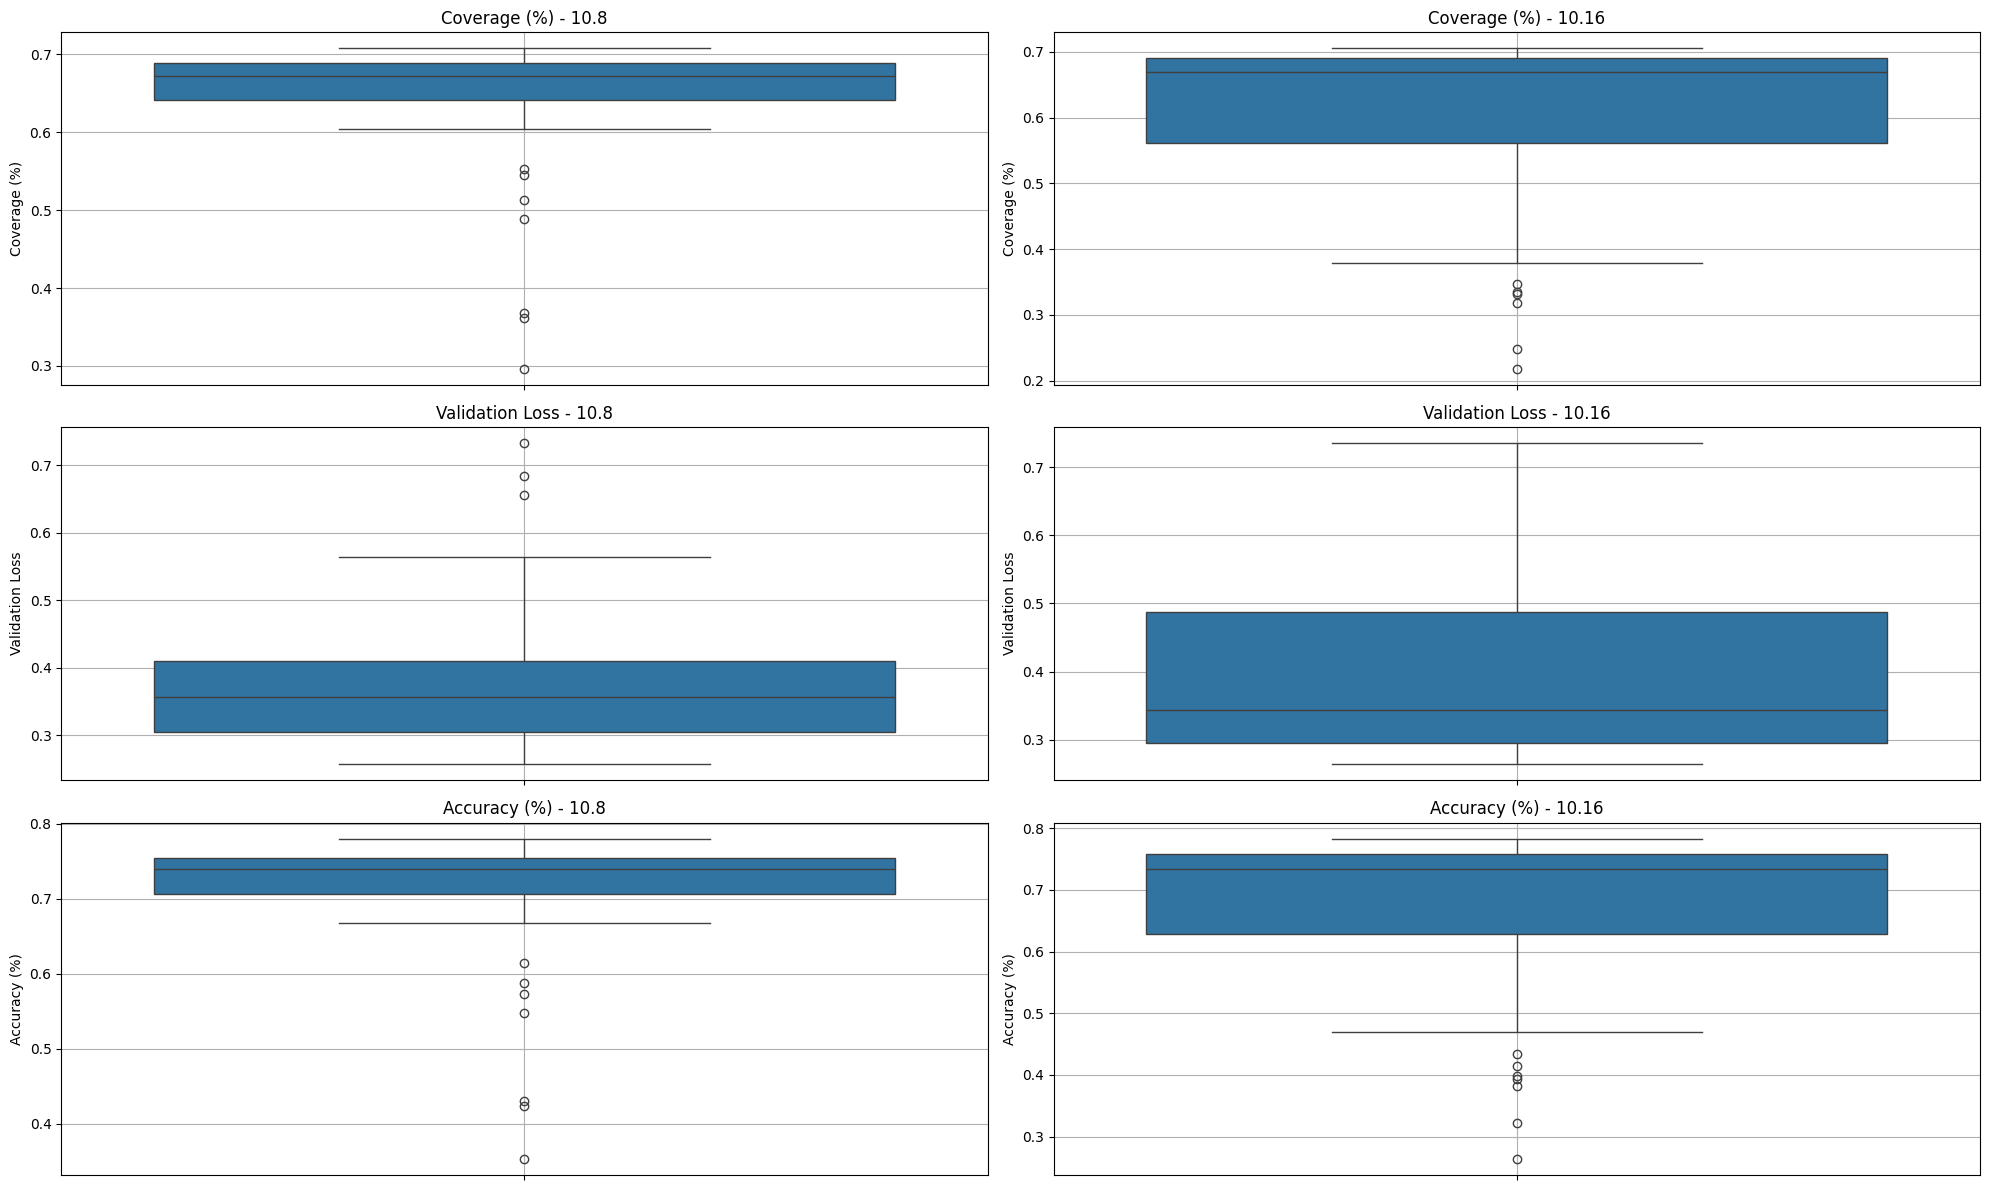

{'10.8':        avg_mask2_coverage  avg_val_loss  avg_mask2_accuracy
 count           58.000000     58.000000           58.000000
 mean             0.641981      0.376230            0.707441
 std              0.084359      0.103846            0.086773
 min              0.296099      0.257369            0.352964
 25%              0.641051      0.304640            0.706368
 50%              0.672265      0.356063            0.739559
 75%              0.688363      0.410701            0.754112
 max              0.707779      0.732286            0.780466,
 '10.16':        avg_mask2_coverage  avg_val_loss  avg_mask2_accuracy
 count           58.000000     58.000000           58.000000
 mean             0.602008      0.393642            0.668949
 std              0.134392      0.120001            0.136769
 min              0.217739      0.264628            0.263607
 25%              0.560585      0.295602            0.628829
 50%              0.669065      0.343548            0.733278
 75%  

In [ ]:
# Reload the CSV files after execution state reset
file_paths = {
    "10.8": "10.8.csv",
    "10.16": "10.16.csv"
}

# Read the data into DataFrames
dataframes = {key: pd.read_csv(path) for key, path in file_paths.items()}

# Calculate summary statistics
summary_stats = {
    key: df[['avg_mask2_coverage', 'avg_val_loss', 'avg_mask2_accuracy']].describe() for key, df in dataframes.items()
}

# Create a figure with multiple subplots for visualization
fig, axes = plt.subplots(3, 2, figsize=(20, 12))

# Titles for metrics
metrics = ['avg_mask2_coverage', 'avg_val_loss', 'avg_mask2_accuracy']
titles = ['Coverage (%)', 'Validation Loss', 'Accuracy (%)']

# Generate boxplots for each metric across all datasets
for i, metric in enumerate(metrics):
    for j, (key, df) in enumerate(dataframes.items()):
        sns.boxplot(data=df[metric], ax=axes[i, j])
        axes[i, j].set_title(f"{titles[i]} - {key}")
        axes[i, j].set_ylabel(titles[i])
        axes[i, j].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Display summary statistics for each dataset
summary_stats

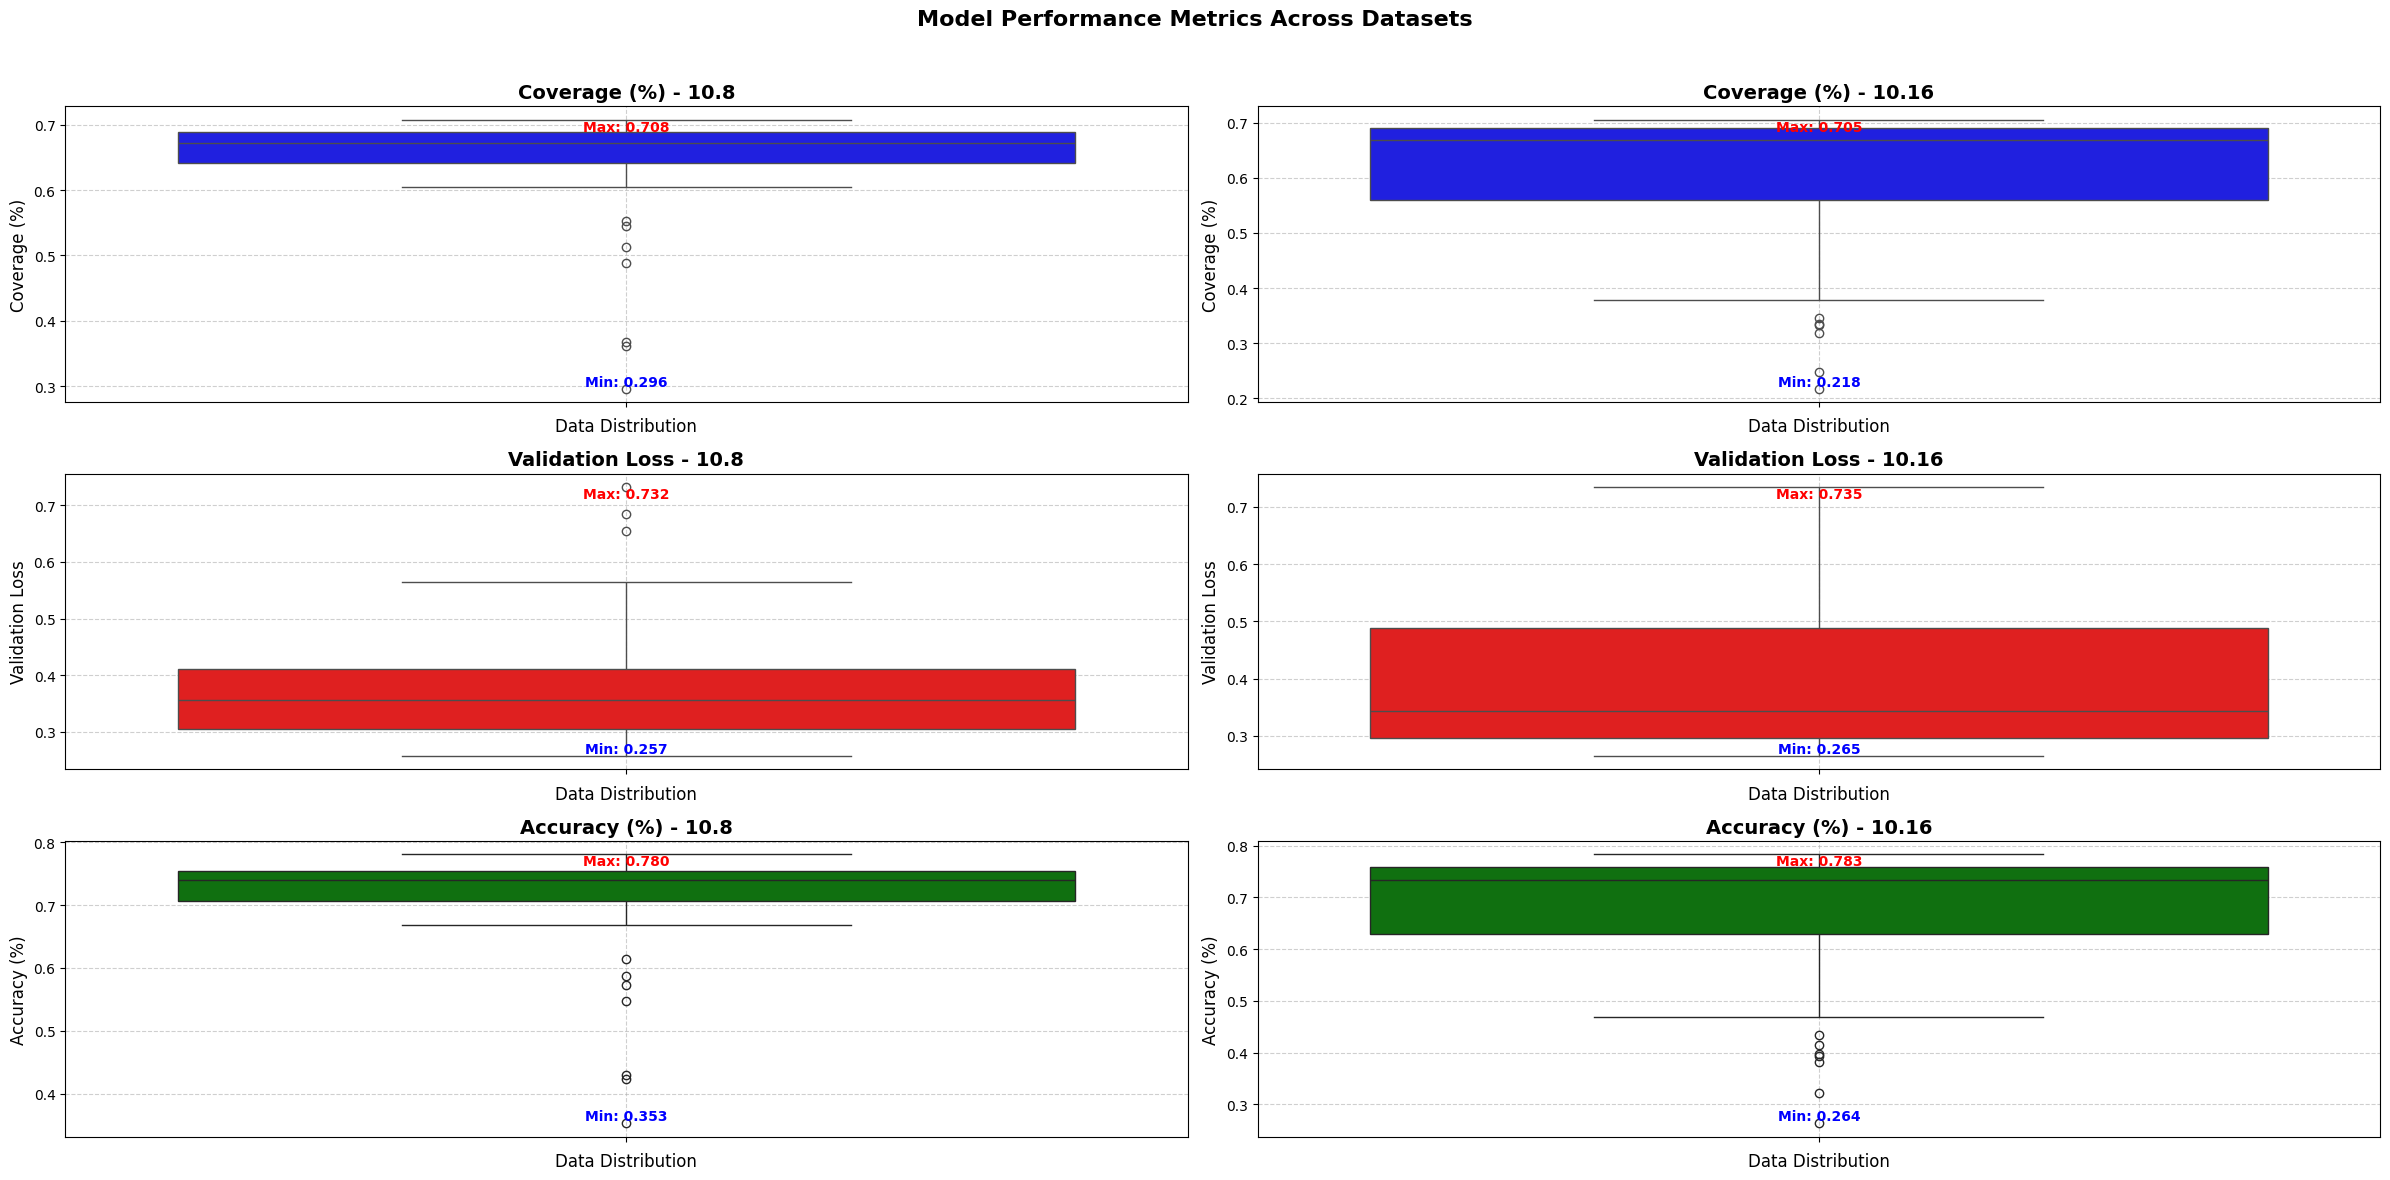

({'10.8':        avg_mask2_coverage  avg_val_loss  avg_mask2_accuracy
  count              58.000        58.000              58.000
  mean                0.642         0.376               0.707
  std                 0.084         0.104               0.087
  min                 0.296         0.257               0.353
  25%                 0.641         0.305               0.706
  50%                 0.672         0.356               0.740
  75%                 0.688         0.411               0.754
  max                 0.708         0.732               0.780,
  '10.16':        avg_mask2_coverage  avg_val_loss  avg_mask2_accuracy
  count              58.000        58.000              58.000
  mean                0.602         0.394               0.669
  std                 0.134         0.120               0.137
  min                 0.218         0.265               0.264
  25%                 0.561         0.296               0.629
  50%                 0.669         0.344           

In [13]:
# Generate summary statistics for Coverage, Loss, and Accuracy
summary_stats = {
    key: df[['avg_mask2_coverage', 'avg_val_loss',
             'avg_mask2_accuracy']].describe().round(3)
    for key, df in dataframes.items()
}

# Extract top 3 models with highest coverage from each dataset
top_models = {
    key: df.nlargest(3, 'avg_mask2_coverage')[
        ['job_name', 'avg_mask2_coverage', 'avg_val_loss', 'avg_mask2_accuracy']]
    for key, df in dataframes.items()
}

# Create a figure with multiple subplots for visualization
fig, axes = plt.subplots(3, 2, figsize=(24, 12))

# Titles for metrics
metrics = ['avg_mask2_coverage', 'avg_val_loss', 'avg_mask2_accuracy']
titles = ['Coverage (%)', 'Validation Loss', 'Accuracy (%)']
colors = ['blue', 'red', 'green']

# Generate boxplots with more details for each metric across all datasets
for i, metric in enumerate(metrics):
    for j, (key, df) in enumerate(dataframes.items()):
        sns.boxplot(data=df[metric], ax=axes[i, j], color=colors[i])
        axes[i, j].set_title(f"{titles[i]} - {key}",
                             fontsize=14, fontweight='bold')
        axes[i, j].set_xlabel('Data Distribution', fontsize=12)
        axes[i, j].set_ylabel(titles[i], fontsize=12)
        axes[i, j].grid(True, linestyle='--', alpha=0.6)
        axes[i, j].tick_params(axis='both', which='major', labelsize=10)

        # Annotate min and max values in the plot
        min_val = df[metric].min()
        max_val = df[metric].max()
        axes[i, j].text(0, min_val, f"Min: {min_val:.3f}", ha='center',
                        va='bottom', fontsize=10, color='blue', fontweight='bold')
        axes[i, j].text(0, max_val, f"Max: {max_val:.3f}", ha='center',
                        va='top', fontsize=10, color='red', fontweight='bold')

# Add an overall title
fig.suptitle("Model Performance Metrics Across Datasets",
             fontsize=16, fontweight='bold')

# Adjust layout and display the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Display summary statistics and top-performing models
summary_stats, top_models

C:\Users\Admin\AppData\Local\Temp\ipykernel_25052\1581300454.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y=metric, data=combined_df,
C:\Users\Admin\AppData\Local\Temp\ipykernel_25052\1581300454.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y=metric, data=combined_df,


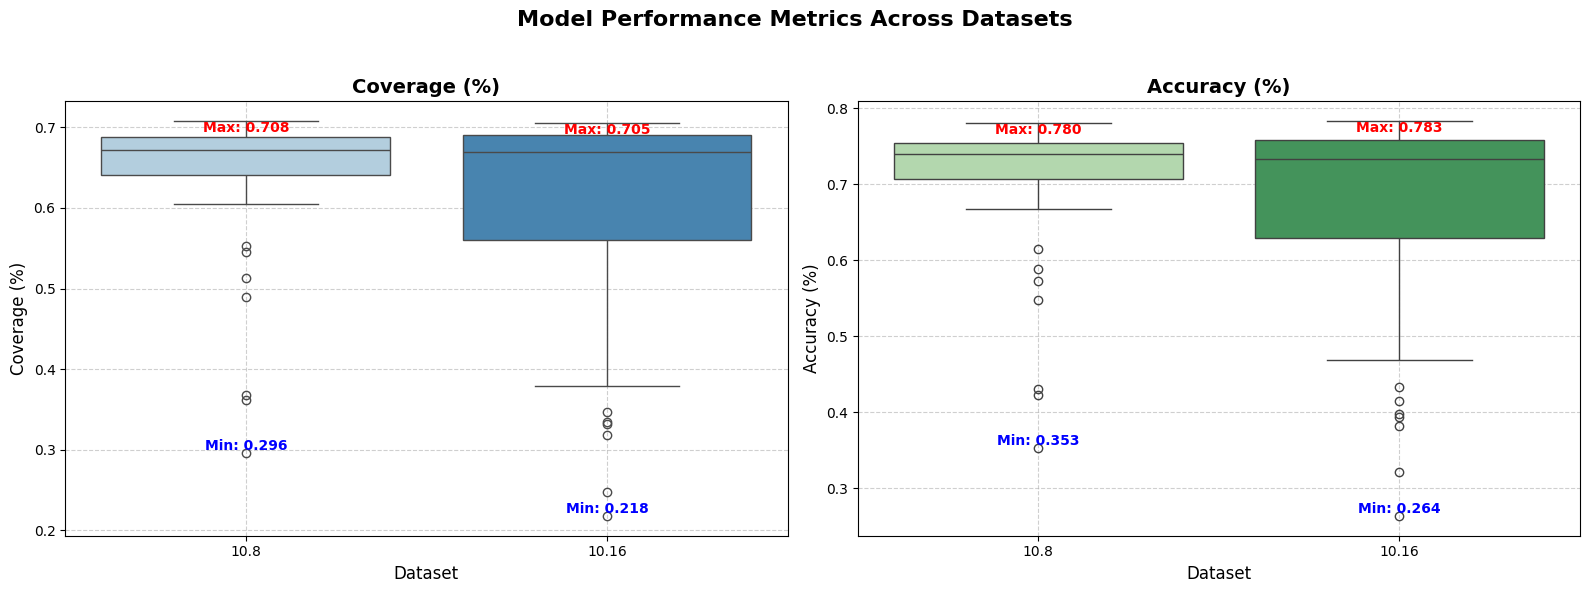

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Metrics and settings
metrics = ['avg_mask2_coverage', 'avg_mask2_accuracy']
titles = ['Coverage (%)', 'Accuracy (%)']
palettes = ['Blues', 'Greens']

# Create 1 row with 2 subplots (Coverage and Accuracy)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Loop through both metrics
for i, metric in enumerate(metrics):
    combined_data = []

    for label, df in dataframes.items():
        df_copy = df.copy()
        df_copy['Dataset'] = label
        combined_data.append(df_copy[['Dataset', metric]])

    combined_df = pd.concat(combined_data)

    # Now properly indented
    sns.boxplot(x='Dataset', y=metric, data=combined_df,
                ax=axes[i], palette=palettes[i])

    axes[i].set_title(titles[i], fontsize=14, fontweight='bold')
    axes[i].set_xlabel("Dataset", fontsize=12)
    axes[i].set_ylabel(titles[i], fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.6)
    axes[i].tick_params(axis='both', labelsize=10)

    # Annotate min/max values
    for j, label in enumerate(combined_df['Dataset'].unique()):
        group = combined_df[combined_df['Dataset'] == label][metric]
        min_val = group.min()
        max_val = group.max()
        axes[i].text(j, min_val, f"Min: {min_val:.3f}", ha='center',
                     va='bottom', fontsize=10, color='blue', fontweight='bold')
        axes[i].text(j, max_val, f"Max: {max_val:.3f}", ha='center',
                     va='top', fontsize=10, color='red', fontweight='bold')

# Final layout
fig.suptitle("Model Performance Metrics Across Datasets",
             fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

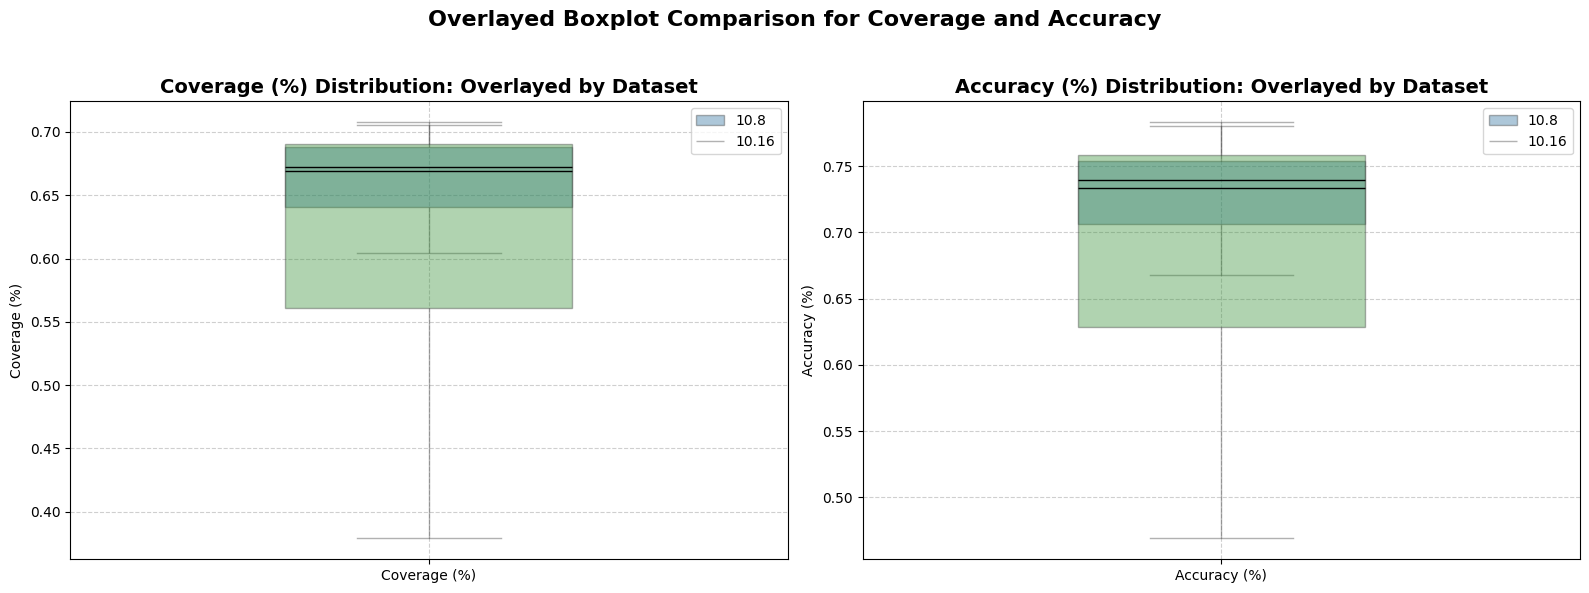

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare for overlapping boxplots
metrics = ['avg_mask2_coverage', 'avg_mask2_accuracy']
titles = ['Coverage (%)', 'Accuracy (%)']
colors = ['#1f77b4', '#2ca02c']  # Blue for 10.8, Green for 10.16

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i, metric in enumerate(metrics):
    # Create overlayed boxplot
    for j, (label, df) in enumerate(dataframes.items()):
        sns.boxplot(
            y=df[metric],
            x=[titles[i]] * len(df),  # same x-label to force overlay
            ax=axes[i],
            width=0.4,
            color=colors[j],
            boxprops=dict(alpha=0.4),
            whiskerprops=dict(alpha=0.4),
            capprops=dict(alpha=0.4),
            medianprops=dict(color='black'),
            showfliers=False
        )

    # Axis formatting
    axes[i].set_title(
        f'{titles[i]} Distribution: Overlayed by Dataset', fontsize=14, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel(titles[i])
    axes[i].legend(["10.8", "10.16"])
    axes[i].grid(True, linestyle='--', alpha=0.6)

fig.suptitle("Overlayed Boxplot Comparison for Coverage and Accuracy",
             fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_25052\2104285324.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y=metric, data=combined_df,
C:\Users\Admin\AppData\Local\Temp\ipykernel_25052\2104285324.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y=metric, data=combined_df,


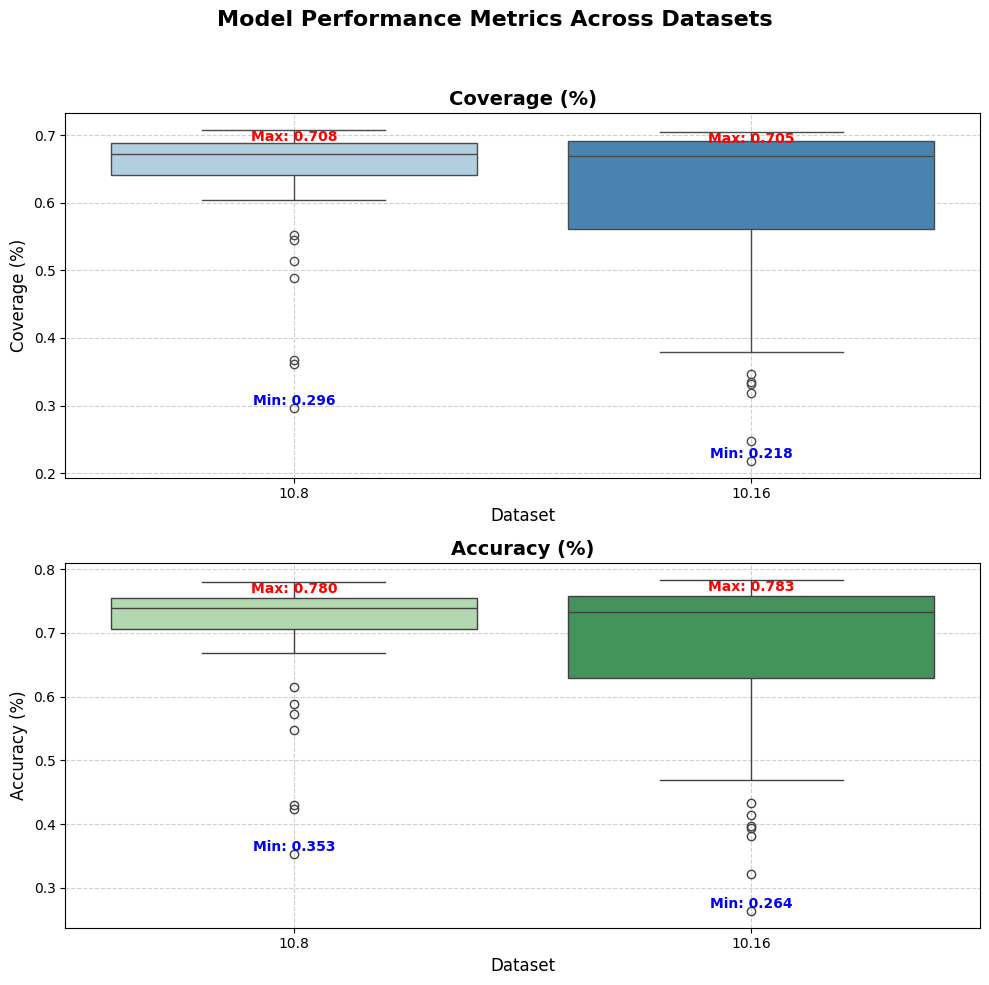

In [ ]:
i

C:\Users\Admin\AppData\Local\Temp\ipykernel_25052\1782974399.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y=metric, data=combined_df,
C:\Users\Admin\AppData\Local\Temp\ipykernel_25052\1782974399.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y=metric, data=combined_df,


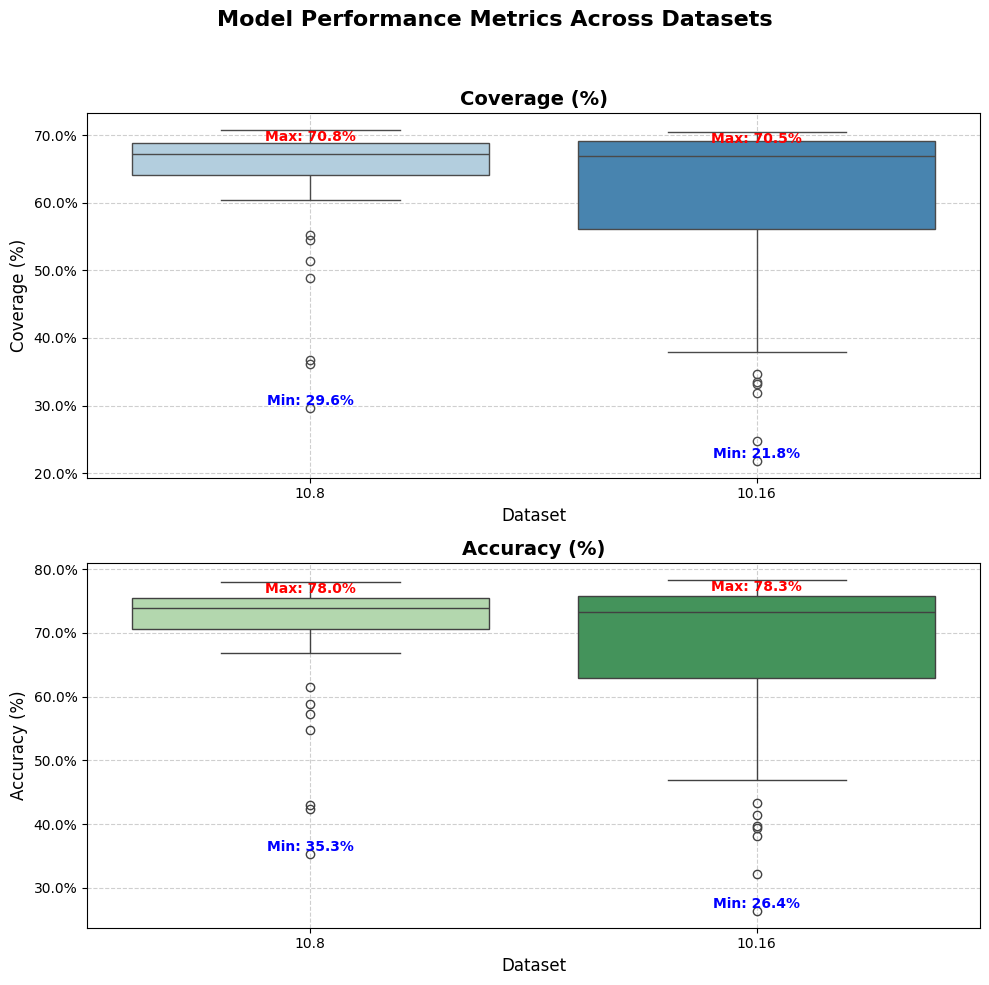

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick

# Metrics and settings
metrics = ['avg_mask2_coverage', 'avg_mask2_accuracy']
titles = ['Coverage (%)', 'Accuracy (%)']
palettes = ['Blues', 'Greens']

# Create 2 vertical subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Loop through each metric (Coverage and Accuracy)
for i, metric in enumerate(metrics):
    combined_data = []

    for label, df in dataframes.items():
        df_copy = df.copy()
        df_copy['Dataset'] = label
        combined_data.append(df_copy[['Dataset', metric]])

    combined_df = pd.concat(combined_data)

    # Create boxplot
    sns.boxplot(x='Dataset', y=metric, data=combined_df,
                ax=axes[i], palette=palettes[i])

    axes[i].set_title(titles[i], fontsize=14, fontweight='bold')
    axes[i].set_xlabel("Dataset", fontsize=12)
    axes[i].set_ylabel(titles[i], fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.6)
    axes[i].tick_params(axis='both', labelsize=10)

    # Format y-axis as percentage
    axes[i].yaxis.set_major_formatter(
        mtick.PercentFormatter(xmax=1.0, decimals=1))

    # Annotate min/max values
    for j, label in enumerate(combined_df['Dataset'].unique()):
        group = combined_df[combined_df['Dataset'] == label][metric]
        min_val = group.min()
        max_val = group.max()
        axes[i].text(j, min_val, f"Min: {min_val:.1%}", ha='center',
                     va='bottom', fontsize=10, color='blue', fontweight='bold')
        axes[i].text(j, max_val, f"Max: {max_val:.1%}", ha='center',
                     va='top', fontsize=10, color='red', fontweight='bold')

# Overall title
fig.suptitle("Model Performance Metrics Across Datasets",
             fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_25052\3942144947.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y=metric, data=combined_df,
C:\Users\Admin\AppData\Local\Temp\ipykernel_25052\3942144947.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y=metric, data=combined_df,


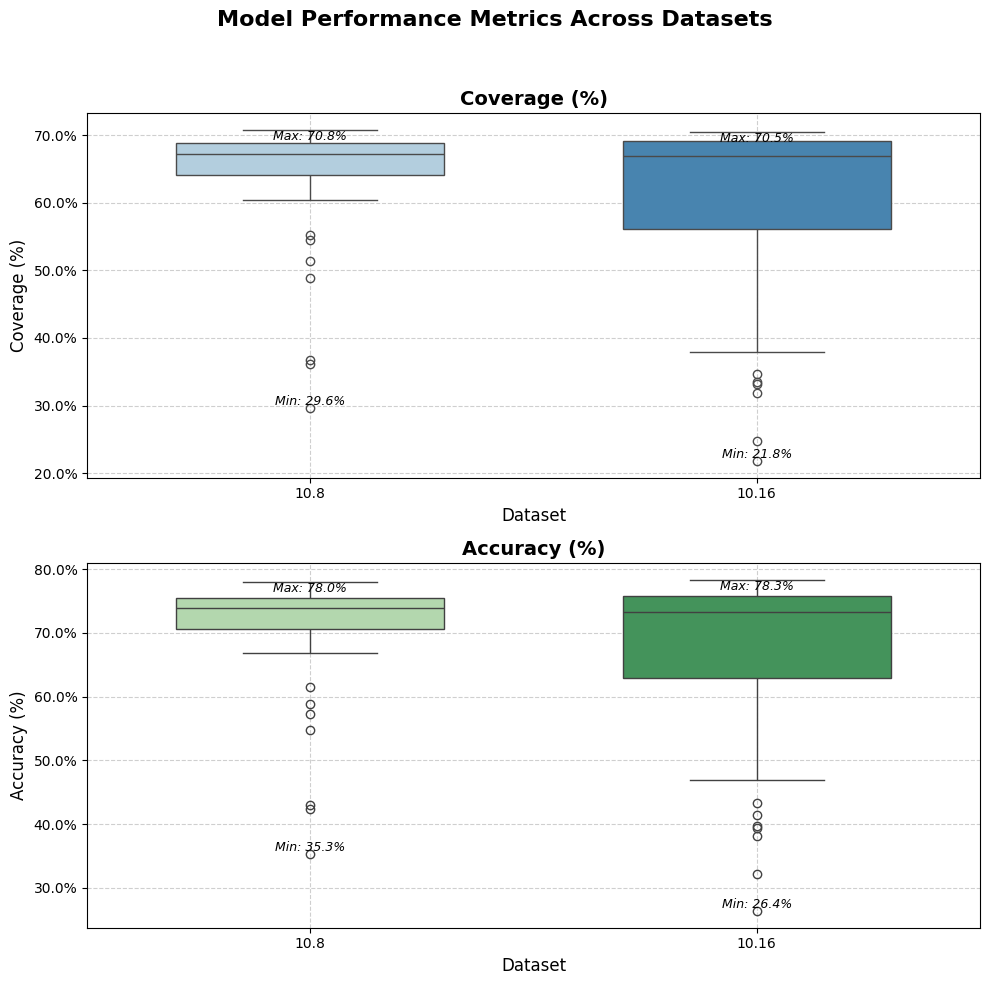

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick

# Metrics and settings
metrics = ['avg_mask2_coverage', 'avg_mask2_accuracy']
titles = ['Coverage (%)', 'Accuracy (%)']
palettes = ['Blues', 'Greens']

# Create 2 vertical subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Loop through each metric (Coverage and Accuracy)
for i, metric in enumerate(metrics):
    combined_data = []

    for label, df in dataframes.items():
        df_copy = df.copy()
        df_copy['Dataset'] = label
        combined_data.append(df_copy[['Dataset', metric]])

    combined_df = pd.concat(combined_data)

    # Create boxplot
    sns.boxplot(x='Dataset', y=metric, data=combined_df,
                ax=axes[i], palette=palettes[i], width=0.6)

    axes[i].set_title(titles[i], fontsize=14, fontweight='bold')
    axes[i].set_xlabel("Dataset", fontsize=12)
    axes[i].set_ylabel(titles[i], fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.6)
    axes[i].tick_params(axis='both', labelsize=10)

    # Format y-axis as percentage
    axes[i].yaxis.set_major_formatter(
        mtick.PercentFormatter(xmax=1.0, decimals=1))

    # Annotate min/max values in professional style
    for j, label in enumerate(combined_df['Dataset'].unique()):
        group = combined_df[combined_df['Dataset'] == label][metric]
        min_val = group.min()
        max_val = group.max()
        axes[i].text(j, min_val, f"Min: {min_val:.1%}", ha='center',
                     va='bottom', fontsize=9, color='black', style='italic')
        axes[i].text(j, max_val, f"Max: {max_val:.1%}", ha='center',
                     va='top', fontsize=9, color='black', style='italic')

# Final title and layout
fig.suptitle("Model Performance Metrics Across Datasets",
             fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [32]:
from combined_loss_plot import plot_combined_loss_trend

plot_combined_loss_trend(df_combined, "avg_train_loss",
                         "avg_val_loss", "Training and Validation Loss Across Epochs")

ModuleNotFoundError: No module named 'combined_loss_plot'